# Ensambling Using Probabilties Sum

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)
test_covid_datagen = ImageDataGenerator(rescale = 1./255)
#test_bacterial_pneumonia_datagen = ImageDataGenerator(rescale = 1./255)
test_normal_datagen = ImageDataGenerator(rescale = 1./255)
#test_viral_pneumonia_datagen = ImageDataGenerator(rescale = 1./255)
#test_tuberculosis_datagen = ImageDataGenerator(rescale = 1./255)

In [3]:
test_set_disease = test_covid_datagen.flow_from_directory(r'D:\Research\New folder\test_disease',
                                                   target_size = (224,224))

Found 15 images belonging to 1 classes.


In [4]:
test_set_normal = test_normal_datagen.flow_from_directory(r'D:\Research\New folder\test_normal',
                                                   target_size = (224,224))
                                                   

Found 15 images belonging to 1 classes.


In [5]:
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input, Average
model_1=load_model('new_tuber_2class_model_xception_trail1.h5')
model_2=load_model('new_tuber_2class_model_vgg16_trail1.h5')
model_3=load_model('new_tuber_2class_model_inceptionv3_trail1.h5')
models=[model_1,model_2,model_3]


In [21]:
preds=[model.predict(test_set_normal) for model in models]
print(preds)

1/1 [==============================] - 4s 4s/step
[array([[5.25651548e-25, 1.00000000e+00],
       [1.50290839e-11, 1.00000000e+00],
       [1.38854506e-19, 1.00000000e+00],
       [1.60166083e-33, 1.00000000e+00],
       [4.64905526e-28, 1.00000000e+00],
       [1.51073706e-30, 1.00000000e+00],
       [1.04877536e-14, 1.00000000e+00],
       [1.00000000e+00, 8.99063322e-13],
       [6.15489540e-33, 1.00000000e+00],
       [1.00000000e+00, 0.00000000e+00],
       [7.12430977e-29, 1.00000000e+00],
       [3.84109514e-28, 1.00000000e+00],
       [4.45431033e-05, 9.99955416e-01],
       [0.00000000e+00, 1.00000000e+00],
       [1.01162973e-22, 1.00000000e+00]], dtype=float32), array([[9.9585056e-01, 4.1494383e-03],
       [1.0000000e+00, 4.3977053e-15],
       [5.4031485e-10, 1.0000000e+00],
       [1.2016068e-03, 9.9879837e-01],
       [4.0227665e-11, 1.0000000e+00],
       [2.7025726e-01, 7.2974271e-01],
       [9.4406474e-01, 5.5935234e-02],
       [9.9791759e-01, 2.0824119e-03],
     

In [22]:
import numpy as np

In [24]:
summed=np.sum(preds,axis=0)

In [25]:
summed

array([[1.6898663 , 1.3101338 ],
       [1.01342   , 1.9865799 ],
       [0.04619968, 2.9538002 ],
       [0.04535721, 2.9546428 ],
       [0.14320156, 2.8567984 ],
       [0.29734895, 2.702651  ],
       [1.1078928 , 1.8921072 ],
       [1.9982036 , 1.0017965 ],
       [1.0023352 , 1.9976648 ],
       [1.2496067 , 1.7503932 ],
       [0.01262356, 2.9873765 ],
       [0.89359933, 2.1064007 ],
       [0.82447886, 2.1755211 ],
       [0.9907283 , 2.0092716 ],
       [0.00385544, 2.9961445 ]], dtype=float32)

In [26]:
arga=np.argmax(summed,axis=1)

In [27]:
arga

array([0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [14]:
preds_disease=[model.predict(test_set_disease) for model in models]

1/1 [==============================] - 4s 4s/step


In [15]:
preds_disease

[array([[1.000000e+00, 0.000000e+00],
        [1.000000e+00, 0.000000e+00],
        [1.000000e+00, 0.000000e+00],
        [1.000000e+00, 0.000000e+00],
        [7.293141e-07, 9.999993e-01],
        [1.000000e+00, 0.000000e+00],
        [1.000000e+00, 0.000000e+00],
        [1.000000e+00, 0.000000e+00],
        [1.000000e+00, 0.000000e+00],
        [1.000000e+00, 0.000000e+00],
        [1.000000e+00, 0.000000e+00],
        [1.000000e+00, 0.000000e+00],
        [1.000000e+00, 0.000000e+00],
        [1.000000e+00, 0.000000e+00],
        [1.000000e+00, 0.000000e+00]], dtype=float32),
 array([[1.0000000e+00, 2.7238843e-17],
        [1.0000000e+00, 3.5235154e-10],
        [9.9999976e-01, 2.1040780e-07],
        [1.0000000e+00, 1.0813351e-17],
        [1.0000000e+00, 7.0627821e-20],
        [1.0000000e+00, 4.2339315e-14],
        [1.0000000e+00, 1.1742670e-12],
        [1.0000000e+00, 1.1896761e-19],
        [1.0000000e+00, 2.3946678e-09],
        [1.0000000e+00, 5.0231036e-15],
        [1.00

In [16]:
summed_disease=np.sum(preds_disease,axis=0)

In [17]:
summed_disease

array([[2.9952407e+00, 4.7594081e-03],
       [2.9994481e+00, 5.5192848e-04],
       [2.9888277e+00, 1.1172457e-02],
       [2.3243873e+00, 6.7561263e-01],
       [1.9992592e+00, 1.0007408e+00],
       [2.9985456e+00, 1.4545047e-03],
       [2.6900895e+00, 3.0991051e-01],
       [2.8126783e+00, 1.8732165e-01],
       [2.8151977e+00, 1.8480232e-01],
       [2.9791784e+00, 2.0821448e-02],
       [2.9981315e+00, 1.8684979e-03],
       [2.9999790e+00, 2.0853928e-05],
       [2.9999819e+00, 1.8136821e-05],
       [2.9999824e+00, 1.7751381e-05],
       [1.8475516e+00, 1.1524484e+00]], dtype=float32)

In [18]:
prediction_disease=np.argmax(summed_disease, axis=1)

In [19]:
prediction_disease

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [28]:
y_preds=[]
y_preds.extend(arga)
y_preds.extend(prediction_disease)
print(y_preds)

[0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [29]:
b=[0]
b_actual=(b*15)
#c=[0]
#c_actual=(c*70)
d=[1]
d_actual=(d*15)
#e=[2]
#e_actual=(e*135)
y_actual = []
#y_actual.extend(a_actual)
y_actual.extend(b_actual)
y_actual.extend(d_actual)
#y_actual.extend(d_actual)
#y_actual.extend(e_actual)
print(y_actual)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [30]:
from sklearn.metrics import confusion_matrix, classification_report

In [31]:
cm = confusion_matrix(y_actual, y_preds)

In [32]:
import seaborn as sns

<AxesSubplot:>

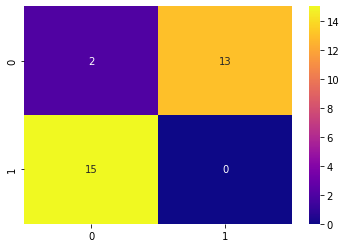

In [33]:
sns.heatmap(cm, cmap="plasma", annot=True)

# Ensambling using Mode

In [30]:
import pandas as pd

In [ ]:
c=[]
for classifier in models:
    
    classifier=classifier
    predictprob=classifier.predict(test_set_normal,verbose=1)
    preds=np.argmax(predictprob,axis=1)
    c.append(preds)

1/1 [==============================] - 6s 6s/step


In [47]:
#print(c)
c_new=np.array(c)

[array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0], dtype=int64), array([1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0], dtype=int64), array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0], dtype=int64)]


In [42]:
df_dataframe=pd.DataFrame(c_new.reshape(15,3))

In [43]:
df_dataframe

,0,1,2
0,1,1,1
1,1,1,1
2,1,1,1
3,1,0,1
4,1,1,0
5,1,1,0
6,1,0,0
7,1,1,1
8,0,1,1
9,0,1,0


In [45]:
df_dataframe.mode(axis=1)

,0
0,1
1,1
2,1
3,1
4,1
5,1
6,0
7,1
8,1
9,0
